# Support Vector Machine Assignment

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### Import the admissions data set (admissions.csv).

In [2]:
data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/admissions.csv')
data.head()

,GRE,TOEFL,SchoolRank,SOP,LOR,GPA,Research,Admitted
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,1
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


## Data Exploration

Before jumping into training a model on the data, let's explore it to get a better sense of the relationships between our features and the target variable.

### Call the Pandas `describe()` method on the data frame to get view the average values and variability for each variable.

In [3]:
data.describe()

,GRE,TOEFL,SchoolRank,SOP,LOR,GPA,Research,Admitted
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.617500
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.486606
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,1.000000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,1.000000


### Group the data by the Admitted field and compute the average values for each field.

In [33]:
avg = data.groupby(by='Admitted')
avg.mean()

,GRE,TOEFL,SchoolRank,SOP,LOR,GPA,Research
Admitted,,,,,,,
0,307.013072,102.588235,2.261438,2.741830,2.875817,8.087974,0.248366
1,322.874494,110.396761,3.599190,3.807692,3.809717,8.915425,0.732794


### How many students that applied were admitted vs. not admitted? What percentage of students were admitted vs. not admitted? 

In [43]:
admitted = data[data['Admitted'] == 1]
admitted['Admitted'].count()

247

In [44]:
rejected = data[data['Admitted'] == 0]
rejected['Admitted'].count()

153

In [45]:
pAdmission = (admitted['Admitted'].count())/(admitted['Admitted'].count() + rejected['Admitted'].count()) * 100
pAdmission

61.75000000000001

### What percent of students with research experience were admitted?

In [54]:
def percent(col, verbose=True):
  p = admitted[col].sum()/(admitted[col].count() + rejected[col].count()) * 100
  if verbose: 
    print(p)
  return p

In [55]:
pResearch = percent('Research')

45.25


### What percent of students admitted had research experience?

In [56]:
admitted['Research'].sum()/admitted['Admitted'].count() * 100

73.27935222672065

### Generate a grouped bar chart showing the number of admissions by SOP score, with separate bars for admitted and not admitted.

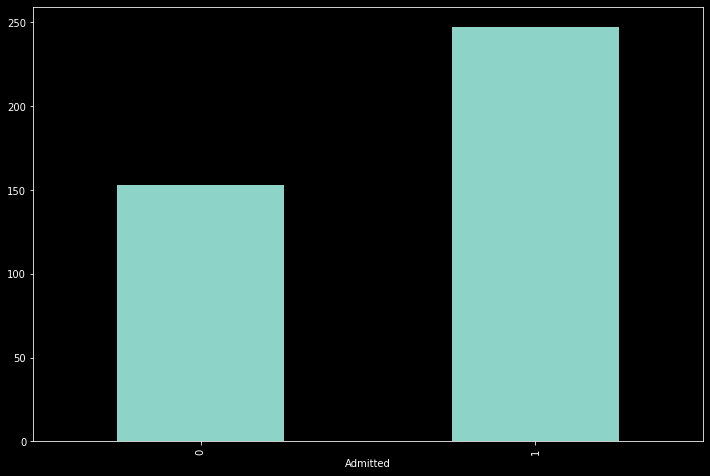

In [78]:
fig, ax = plt.subplots(figsize=(12, 8))
#x = np.arange(len(data.SOP.nunique()))

# Define bar width. We'll use this to offset the second bar.
bar_width = 0.4

plt.style.use(['dark_background'])
avg['SOP'].size().plot.bar()
plt.show()

### Generate a grouped bar chart showing the number of admissions by LOR score, with separate bars for admitted and not admitted.

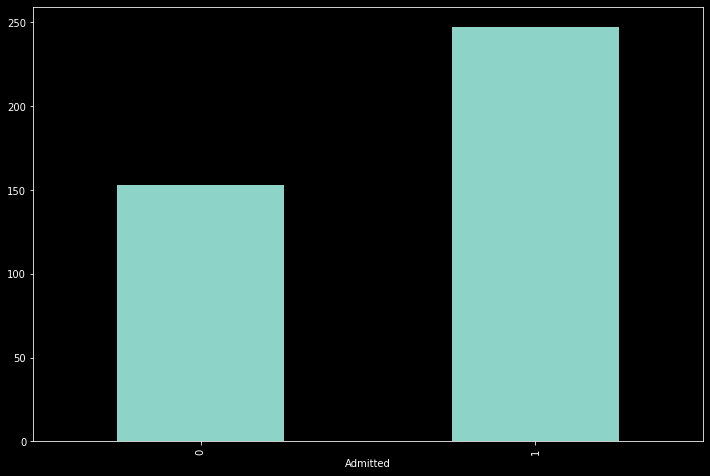

In [79]:
fig, ax = plt.subplots(figsize=(12, 8))
#x = np.arange(len(data.SOP.nunique()))

# Define bar width. We'll use this to offset the second bar.
bar_width = 0.4

plt.style.use(['dark_background'])
avg['LOR'].size().plot.bar()
plt.show()

### Generate a scatter plot where the axes are GRE and TOEFL fields and the data points are color-coded by whether the student was admitted.

Think about how you might go about determining the decision boundary to separate admitted from non-admitted students.

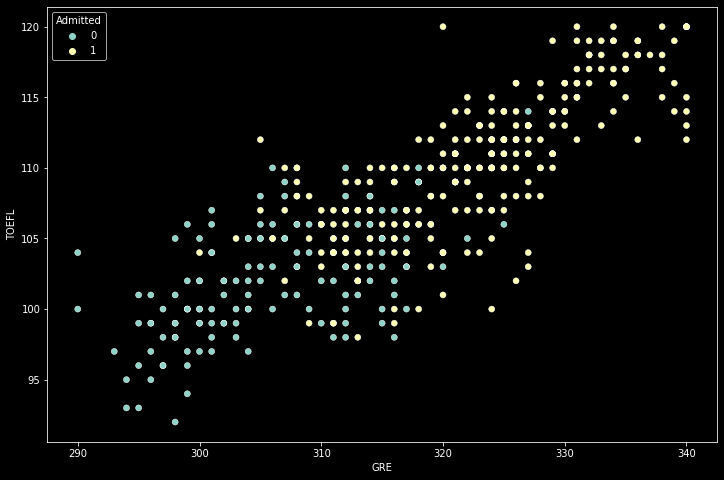

In [82]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(data=data, x='GRE', y='TOEFL', hue='Admitted', ax=ax)
plt.show()

### Generate a scatter plot where the axes are GPA and TOEFL fields and the data points are color-coded by whether the student was admitted.

Think about how you might go about determining the decision boundary to separate admitted from non-admitted students.

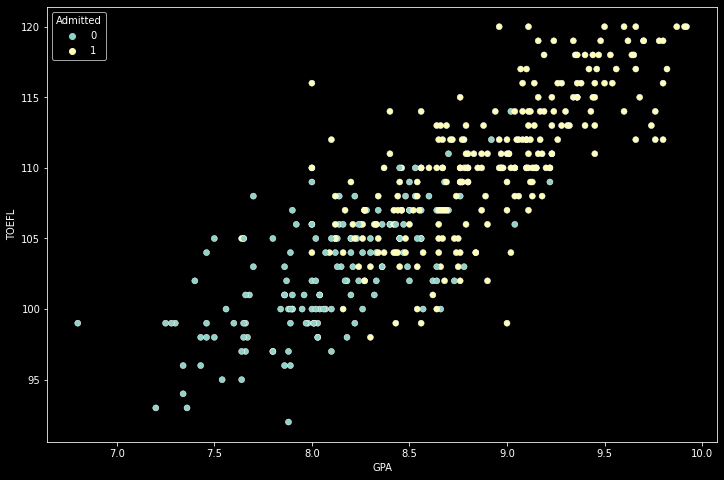

In [83]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(data=data, x='GPA', y='TOEFL', hue='Admitted', ax=ax)
plt.show()

### Generate a scatter plot where the axes are GRE and GPA fields and the data points are color-coded by whether the student was admitted.

Think about how you might go about determining the decision boundary to separate admitted from non-admitted students.

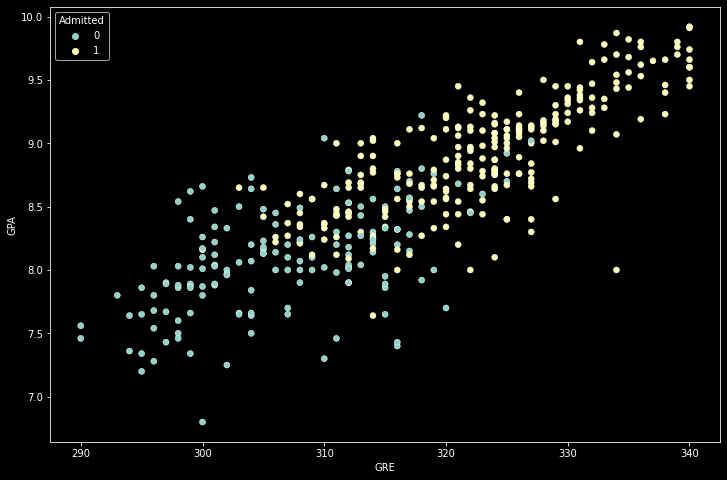

In [84]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(data=data, x='GRE', y='GPA', hue='Admitted', ax=ax)
plt.show()

## Model Training and Evaluation

Now that we have gained a sense of familiarity with our data, let's train a model to predict admissions.

### Split the data into a training and test sets, where the test set contains 20% of the data.

In [86]:
from sklearn.model_selection import train_test_split
y = data['Admitted']
X = data.drop(columns='Admitted')

#Size of the test set.
SIZE = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=SIZE)

### Use the linear kernel to train a Support Vector Classifier (SVC) model on the training data. Report the scores for both the training and test data.

In [103]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

clf_train = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_train.fit(X_train, y_train)
y_pred_train = clf_train.predict(X_train)
    
    
#clf_test = make_pipeline(StandardScaler(), SVC(gamma='auto'))    
y_pred_test = clf_train.predict(X_test)

print('MSE Train: ', mean_squared_error(y_train, y_pred_train, squared=False))
print('MSE Test: ', mean_squared_error(y_test, y_pred_test, squared=False))


MSE Train:  0.3651483716701107
MSE Test:  0.34641016151377546


In [104]:
clf_train.score(X_train, y_train)

0.8666666666666667

In [105]:
clf_train.score(X_test, y_test)

0.88

### Generate a classification report for the SVC model you trained.

How do the evaluation metrics differ across classes?

In [97]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       115
           1       0.90      0.88      0.89       185

    accuracy                           0.87       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.87      0.87      0.87       300



In [98]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85        38
           1       0.95      0.85      0.90        62

    accuracy                           0.88       100
   macro avg       0.87      0.89      0.88       100
weighted avg       0.89      0.88      0.88       100



They're pretty decent, I'd say. I've got more support in the admission class. 